In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv('student.csv',header=1)

In [25]:
df.head()

,male,group A,high school,standard,completed,67,67.1,63
0,female,group D,some high school,free/reduced,none,40,59,55
1,male,group E,some college,free/reduced,none,59,60,50
2,male,group B,high school,standard,none,77,78,68
3,male,group E,associate's degree,standard,completed,78,73,68
4,female,group D,high school,standard,none,63,77,76


In [27]:
df.rename(columns={'male':'Gender','group A':'ethnicity','high school':'parental education level', 'standard':'lunch','completed':'test preparation course','67':'math score','67.1':'reading score','63':'writing score'},inplace=True)

In [28]:
df.head()


,Gender,ethnicity,parental education level,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some high school,free/reduced,none,40,59,55
1,male,group E,some college,free/reduced,none,59,60,50
2,male,group B,high school,standard,none,77,78,68
3,male,group E,associate's degree,standard,completed,78,73,68
4,female,group D,high school,standard,none,63,77,76


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    999 non-null    object
 1   ethnicity                 999 non-null    object
 2   parental education level  999 non-null    object
 3   lunch                     999 non-null    object
 4   test preparation course   999 non-null    object
 5   math score                999 non-null    int64 
 6   reading score             999 non-null    int64 
 7   writing score             999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


DATA CLEANING

In [30]:
##checking missing values
df[df.isnull().any(axis=1)]

,Gender,ethnicity,parental education level,lunch,test preparation course,math score,reading score,writing score


In [31]:
df.head()

,Gender,ethnicity,parental education level,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some high school,free/reduced,none,40,59,55
1,male,group E,some college,free/reduced,none,59,60,50
2,male,group B,high school,standard,none,77,78,68
3,male,group E,associate's degree,standard,completed,78,73,68
4,female,group D,high school,standard,none,63,77,76


In [23]:
df.head()


,male,group A,high school,standard,completed,67,67.1,63
0,female,group D,some high school,free/reduced,none,40,59,55
1,male,group E,some college,free/reduced,none,59,60,50
2,male,group B,high school,standard,none,77,78,68
3,male,group E,associate's degree,standard,completed,78,73,68
4,female,group D,high school,standard,none,63,77,76


In [33]:
df.isnull().sum()

Gender                      0
ethnicity                   0
parental education level    0
lunch                       0
test preparation course     0
math score                  0
reading score               0
writing score               0
dtype: int64

In [34]:
##Removing the null values and reseting the indexes to make sure there is no gap between  the regions 
df = df.dropna().reset_index(drop=True)

In [35]:
df.iloc[[122]]

,Gender,ethnicity,parental education level,lunch,test preparation course,math score,reading score,writing score
122,female,group C,some high school,standard,completed,41,43,45


In [36]:
df = df.drop(122).reset_index(drop=True)

In [37]:
df.iloc[[122]]

,Gender,ethnicity,parental education level,lunch,test preparation course,math score,reading score,writing score
122,female,group D,associate's degree,standard,none,74,78,86


In [38]:
df.columns

Index(['Gender', 'ethnicity', 'parental education level', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [39]:
#fix spaces in columns names
df.columns = df.columns.str.strip()
df.columns

Index(['Gender', 'ethnicity', 'parental education level', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    998 non-null    object
 1   ethnicity                 998 non-null    object
 2   parental education level  998 non-null    object
 3   lunch                     998 non-null    object
 4   test preparation course   998 non-null    object
 5   math score                998 non-null    int64 
 6   reading score             998 non-null    int64 
 7   writing score             998 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 62.5+ KB


In [41]:
df.nunique()


Gender                       2
ethnicity                    5
parental education level     6
lunch                        2
test preparation course      2
math score                  77
reading score               73
writing score               76
dtype: int64

change the required columns as integers data type

In [42]:
df.describe()

,math score,reading score,writing score
count,998.000000,998.00000,998.000000
mean,66.420842,69.03006,67.765531
std,15.397288,14.72888,15.599267
min,13.000000,27.00000,23.000000
25%,56.000000,60.00000,58.000000
50%,66.500000,70.00000,68.000000
75%,77.000000,79.00000,79.000000
max,100.000000,100.00000,100.000000


EXPLORATORY DATA ANAYLYSIS

In [43]:
print("Categories in 'gender' variables:   ",end='')
print(df['Gender'].unique())

print("Categories in 'ethnicity' variables:   ",end='')
print(df['ethnicity'].unique())

print("Categories in 'parental education level' variables:   ",end='')
print(df['parental education level'].unique())

print("Categories in 'lunch' variables:   ",end='')
print(df['lunch'].unique())

print("Categories in 'test preparation course' variables:   ",end='')
print(df['test preparation course'].unique())

Categories in 'gender' variables:   ['female' 'male']
Categories in 'ethnicity' variables:   ['group D' 'group E' 'group B' 'group A' 'group C']
Categories in 'parental education level' variables:   ['some high school' 'some college' 'high school' "associate's degree"
 "bachelor's degree" "master's degree"]
Categories in 'lunch' variables:   ['free/reduced' 'standard']
Categories in 'test preparation course' variables:   ['none' 'completed']


In [44]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O'] 

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['Gender', 'ethnicity', 'parental education level', 'lunch', 'test preparation course']


In [45]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3
df.head()

,Gender,ethnicity,parental education level,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group D,some high school,free/reduced,none,40,59,55,154,51.333333
1,male,group E,some college,free/reduced,none,59,60,50,169,56.333333
2,male,group B,high school,standard,none,77,78,68,223,74.333333
3,male,group E,associate's degree,standard,completed,78,73,68,219,73.000000
4,female,group D,high school,standard,none,63,77,76,216,72.000000


In [46]:
reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

print('Number of students with full marks in reading : {}'.format(reading_full))
print('Number of students with full marks in writing : {}'.format(writing_full))
print('Number of students with full marks in math : {}'.format(math_full))

Number of students with full marks in reading : 19
Number of students with full marks in writing : 18
Number of students with full marks in math : 14


In [49]:
reading_less_20 = df[df['reading score'] < 20]['average score'].count()
writing_less_20 = df[df['writing score'] < 20]['average score'].count()
math_less_20 = df[df['math score'] < 20]['average score'].count

print('Number of students with less than 20 marks in reading : {}'.format(reading_less_20))
print('Number of students with less than 20 marks in writing : {}'.format(writing_less_20))
print('Number of students with less than 20 marks in math : {}'.format(math_less_20))

Number of students with less than 20 marks in reading : 0
Number of students with less than 20 marks in writing : 0
Number of students with less than 20 marks in math : <bound method Series.count of 390    21.666667
830    28.666667
Name: average score, dtype: float64>


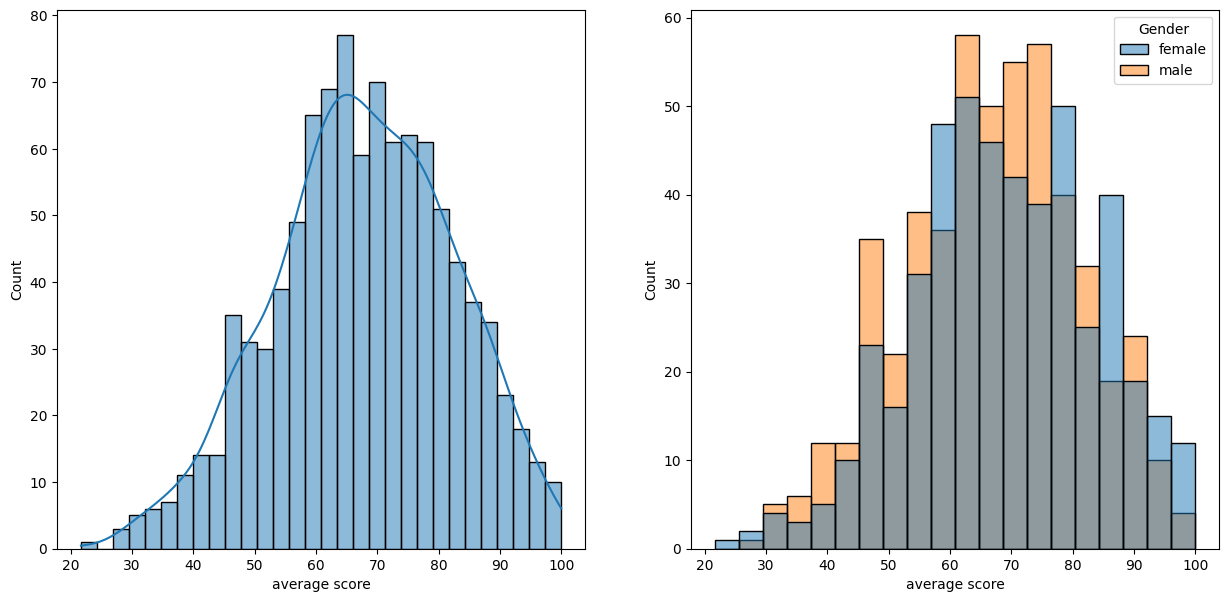

In [61]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average score', bins=30, kde=True)
plt.subplot(122)
sns.histplot(data=df, x='average score',hue='Gender')
plt.show()

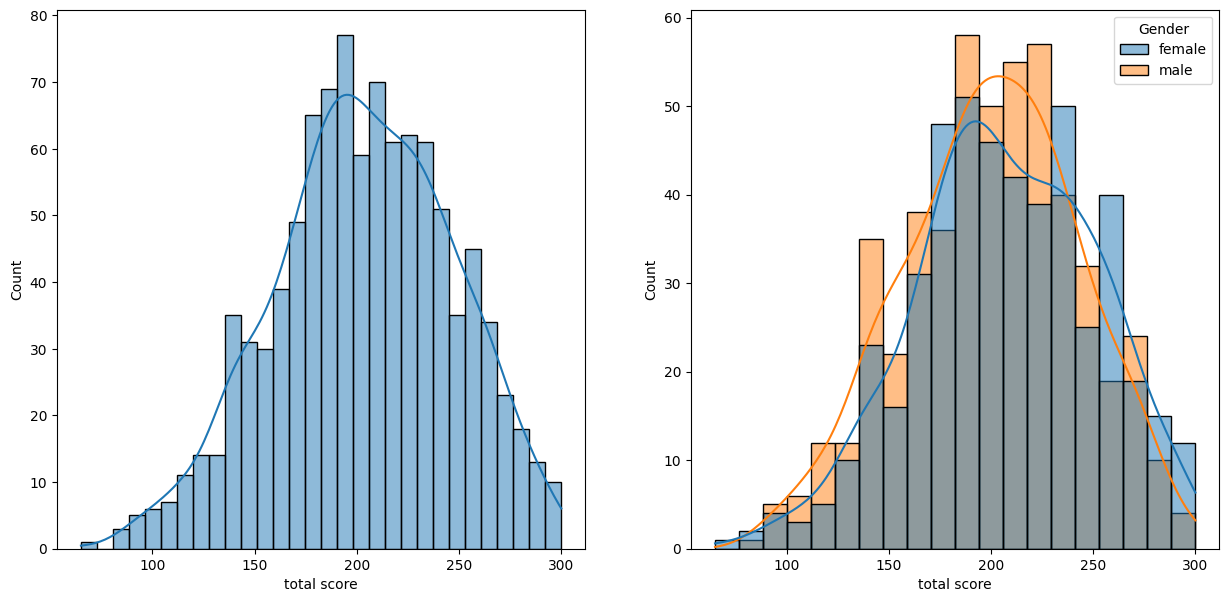

In [60]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True)
plt.subplot(122)
sns.histplot(data=df, x='total score',kde=True,hue='Gender')
plt.show()